# Monte Carlo Simulation
## Takao Oba
#### Assisted by quantpy

##### Monte Carlo simulation is a method used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It involves running many repeated trials of the process and collecting data on the outcomes in order to estimate the likelihood of various events occurring. Monte Carlo simulations are often used in business and finance, engineering, and the physical and social sciences. They can be used to model a wide range of systems, from financial markets to complex biological processes.

In [14]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

import yfinance as yfin
yfin.pdr_override()

In [8]:
# importing the data
def get_data(stocks, start, end): # return mean return and covariance matrix
    stockData = pdr.get_data_yahoo(stocks, start, end) # getting stock data
    stockData = stockData['Close'] # choose only close price
    returns = stockData.pct_change() # daily changes 
    meanReturns = returns.mean() # use returns to compute mean returns
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [9]:
stocks = ['AAPL', 'MSFT', 'NFLX', 'GOOGL', 'NVDA']
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

In [10]:
meanReturns, covMatrix = get_data(stocks, startDate, endDate)
print(meanReturns)

[*********************100%***********************]  5 of 5 completed
AAPL    -0.000718
GOOGL   -0.001591
MSFT    -0.000725
NFLX     0.000563
NVDA    -0.001184
dtype: float64


In [11]:
# weights for portfolio
weights = np.random.random(len(meanReturns))
weights/= np.sum(weights) # normalize by sum of all weights
print(weights)

[0.17717325 0.30977377 0.13243836 0.28576263 0.094852  ]


### Monte Carlo Method

In [12]:
# Number of simulations
mc_sims = 100
T = 100 #timeframe in days

# empty arrays that we initialize
meanM = np.full(shape = (T, len(weights)), fill_value = meanReturns)
meanM = meanM.T # transpose

portfolio_sims = np.full(shape =(T, mc_sims), fill_value = 0.0) # so floats can be added


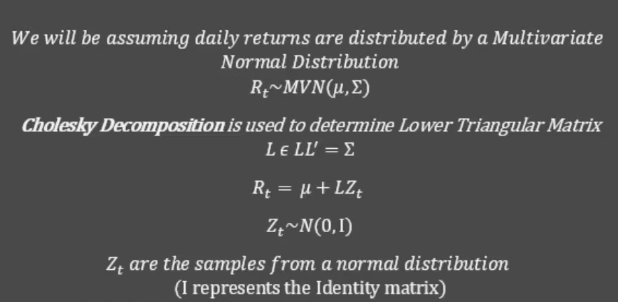

##### The Cholesky decomposition is often used in Monte Carlo simulation as a way to efficiently sample from multivariate normal distributions. In a Monte Carlo simulation, one typically needs to generate a large number of random samples from a multivariate normal distribution with a given mean and covariance matrix. The Cholesky decomposition can be used to transform independent standard normal samples into samples from a multivariate normal distribution with the desired mean and covariance. This can be faster and more stable numerically than other methods, such as the eigendecomposition or singular value decomposition.

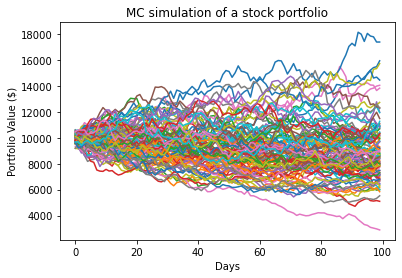

In [21]:
# take a lot of uncorrelated sample data, correlate with cov matrix with use of lower triangular Matrix

initialPortfolio = 10000

L = np.linalg.cholesky(covMatrix)
for m in range(0, mc_sims):
    # MC Loops
    Z = np.random.normal(size = (T, len(weights)))
    
    # lower triangle
    dailyReturns = meanM + np.inner(L,Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1) * initialPortfolio # cumulative product of daily return

    
plt.plot(portfolio_sims)
plt.ylabel("Portfolio Value ($)")
plt.xlabel("Days")
plt.title("MC simulation of a stock portfolio")
plt.show()

# simulated a stock portfolio of 10000 dollars

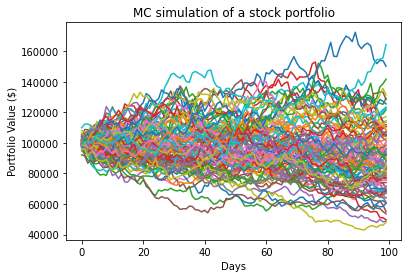

In [22]:
# take a lot of uncorrelated sample data, correlate with cov matrix with use of lower triangular Matrix

initialPortfolio = 100000

L = np.linalg.cholesky(covMatrix)
for m in range(0, mc_sims):
    # MC Loops
    Z = np.random.normal(size = (T, len(weights)))
    
    # lower triangle
    dailyReturns = meanM + np.inner(L,Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1) * initialPortfolio # cumulative product of daily return

    
plt.plot(portfolio_sims)
plt.ylabel("Portfolio Value ($)")
plt.xlabel("Days")
plt.title("MC simulation of a stock portfolio")
plt.show()

# simulated a stock portfolio of 100000 dollars

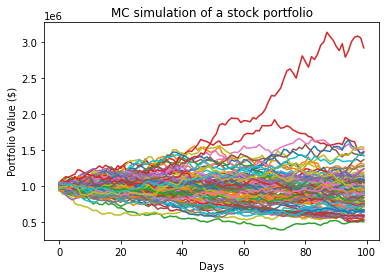

In [24]:
# take a lot of uncorrelated sample data, correlate with cov matrix with use of lower triangular Matrix

initialPortfolio = 1000000

L = np.linalg.cholesky(covMatrix)
for m in range(0, mc_sims):
    # MC Loops
    Z = np.random.normal(size = (T, len(weights)))
    
    # lower triangle
    dailyReturns = meanM + np.inner(L,Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1) * initialPortfolio # cumulative product of daily return

    
plt.plot(portfolio_sims)
plt.ylabel("Portfolio Value ($)")
plt.xlabel("Days")
plt.title("MC simulation of a stock portfolio")
plt.show()

# simulated a stock portfolio of 1000000 dollars

# *In conclusion, I utilized the Monte Carlo method to simulate the performance of a stock portfolio over a given timeframe. *